In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/tunnel.csv',
parse_dates = ['Day'])

df = df.set_index('Day').to_period()

df.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [3]:
### set default matplotlib parameters

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

plt.rc(
    "figure",
    figsize=(12,8),
    titlesize=18,
    titleweight='bold',
    autolayout =True
)

plt.rc(

    "axes",
    labelsize=16,
    labelweight='bold',
    titleweight='bold',
    titlepad=10,
    titlesize=18
)
plot_params = dict(

    color = '0.75',
    style = '-',
    markeredgecolor = '0.25',
    markerfacecolor = '0.25',
    legend =False
)

In [4]:
df.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


##### Time features model

In [5]:
df['Time'] = np.arange(len(df.index))

df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


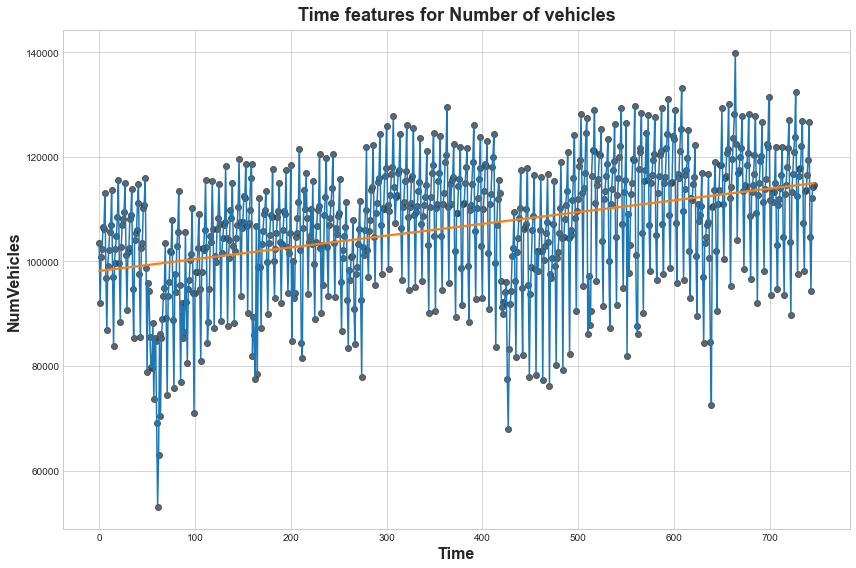

In [6]:
fig, ax = plt.subplots()
ax.plot('Time', 'NumVehicles', data = df)
ax = sns.regplot(x = 'Time', y = 'NumVehicles', data = df, ci=None, scatter_kws = dict(color = '0.25'))
ax.set_title('Time features for Number of vehicles')
plt.show()

In [7]:
df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [8]:
df['Lag_1'] = df['NumVehicles'].shift(1)

df.reindex(['NumVehicles', 'Lag_1'], index = df.index)

df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [10]:
X = df.loc[:, ["Lag_1"]]
y = df.loc[:, 'NumVehicles']

In [11]:
from sklearn.linear_model import LinearRegression
df.dropna(inplace=True)
y, X = y.align(X, join = 'inner')

X = df.loc[:, ['Lag_1']]
y = df.loc[:, 'NumVehicles']

model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [12]:
plot_params = dict(
    markereyecolor = '0.25',
    markerfacecolor = '0.25',
    style = '-',
    color = '0.75',
    legend = False
)

In [13]:
y_preds = pd.Series(model.predict(X), index = X.index)

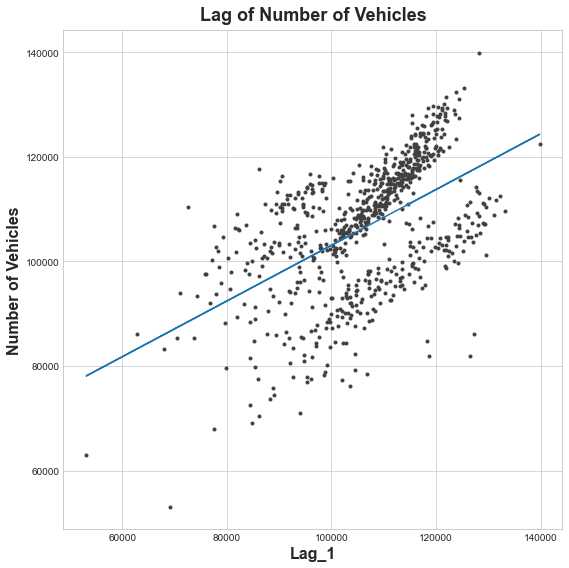

In [14]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_preds)
ax.set_aspect('equal')
ax.set_xlabel('Lag_1')
ax.set_ylabel('Number of Vehicles')
ax.set_title('Lag of Number of Vehicles')
plt.show()